In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
%pip install numpy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 3.6 MB/s  0:00:02m0:00:0100:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 4.9 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 2.6 MB/s  0:00:01 eta 0:00:01
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 11.3 MB/s  0:00:02 eta 0:00:01

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

In [2]:
df = pd.read_csv("dataset.csv")

df.shape
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3420 entries, 0 to 3419
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   OBJECTID_12_13_14                           3420 non-null   int64  
 1   OBJECTID                                    3420 non-null   int64  
 2   ED ID                                       3420 non-null   object 
 3   ED Name                                     3420 non-null   object 
 4   Constituency                                3420 non-null   object 
 5   County                                      3420 non-null   object 
 6   Population                                  3420 non-null   int64  
 7   Pobal HP Description 2022                   3420 non-null   object 
 8   Pobal HP Index 2022                         3420 non-null   float64
 9   Age Dependency Ratio 2022 %                 3420 non-null   float64
 10  Lone Parent 

In [3]:
cols = [
    "ED Name",
    "County",
    "Proportion at Third Level Education 2016 %",
    "Unemployment Rate - Male",
    "Unemployment Rate - Female"
]

d = df[cols].copy()

d = d.rename(columns={
    "Proportion at Third Level Education 2016 %": "third_level_pct",
    "Unemployment Rate - Male": "unemp_male",
    "Unemployment Rate - Female": "unemp_female"
})


In [4]:
for c in ["third_level_pct", "unemp_male", "unemp_female"]:
    d[c] = pd.to_numeric(d[c], errors="coerce")

d.isna().sum()
d = d.dropna(subset=["third_level_pct", "unemp_male", "unemp_female"])


In [5]:
d["unemp_overall"] = (d["unemp_male"] + d["unemp_female"]) / 2

In [6]:
d[["third_level_pct", "unemp_male", "unemp_female", "unemp_overall"]].describe()

,third_level_pct,unemp_male,unemp_female,unemp_overall
count,3420.000000,3420.000000,3420.000000,3420.000000
mean,37.511380,7.624837,7.027909,7.326373
std,10.945258,4.271566,3.790086,3.633696
min,3.958333,0.000000,0.000000,0.000000
25%,30.607183,4.783456,4.481472,4.872803
50%,35.792109,6.806283,6.459914,6.544481
75%,42.507780,9.645783,8.930942,8.934192
max,85.637343,55.000000,33.250620,40.811688


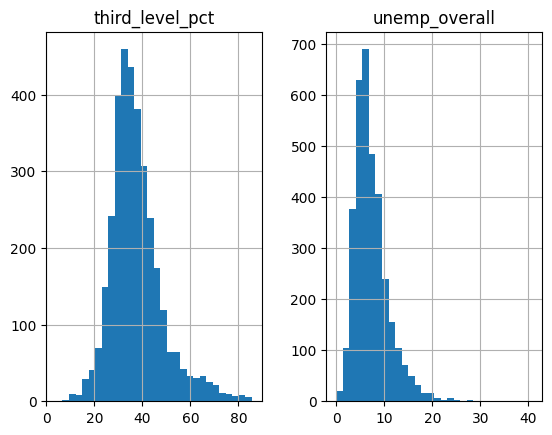

In [7]:
d[["third_level_pct", "unemp_overall"]].hist(bins=30)
plt.show()

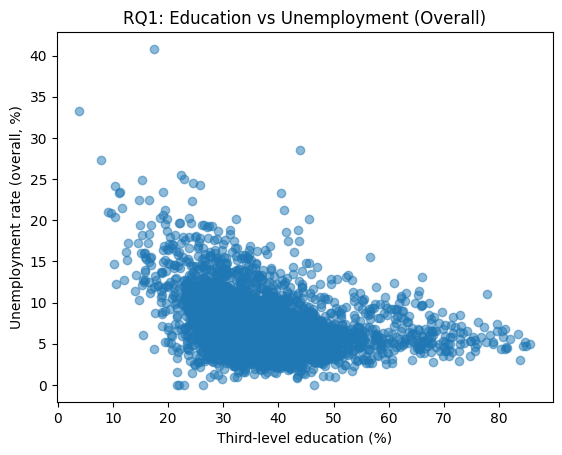

In [8]:
plt.figure()
plt.scatter(d["third_level_pct"], d["unemp_overall"], alpha=0.5)
plt.xlabel("Third-level education (%)")
plt.ylabel("Unemployment rate (overall, %)") 
plt.title("RQ1: Education vs Unemployment (Overall)")
plt.show()

In [9]:
x = d["third_level_pct"]
y = d["unemp_overall"]

pear_r, pear_p = pearsonr(x, y)
spear_r, spear_p = spearmanr(x, y)

pear_r, pear_p, spear_r, spear_p

(np.float64(-0.348796727218171),
 np.float64(2.049926080512801e-98),
 np.float64(-0.3525572336699192),
 np.float64(1.1887056818758943e-100))

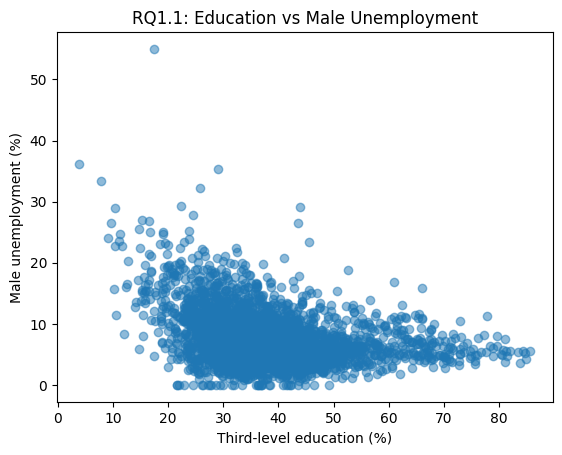

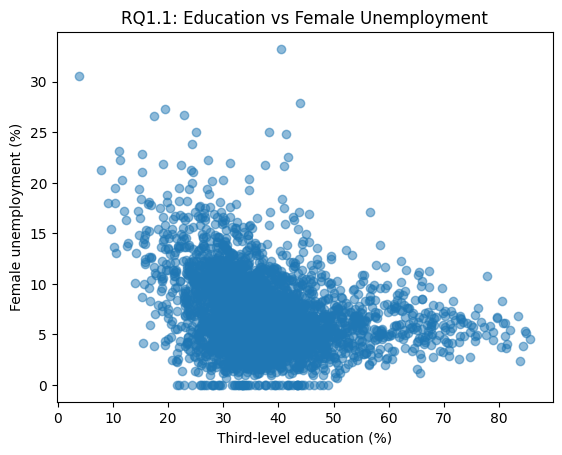

In [10]:
# Male
plt.figure()
plt.scatter(d["third_level_pct"], d["unemp_male"], alpha=0.5)
plt.xlabel("Third-level education (%)")
plt.ylabel("Male unemployment (%)")
plt.title("RQ1.1: Education vs Male Unemployment")
plt.show()

# Female
plt.figure()
plt.scatter(d["third_level_pct"], d["unemp_female"], alpha=0.5)
plt.xlabel("Third-level education (%)")
plt.ylabel("Female unemployment (%)")
plt.title("RQ1.1: Education vs Female Unemployment")
plt.show()

In [11]:
r_m, p_m = pearsonr(d["third_level_pct"], d["unemp_male"])
r_f, p_f = pearsonr(d["third_level_pct"], d["unemp_female"])

(r_m, p_m), (r_f, p_f)

((np.float64(-0.32805440578757883), np.float64(1.282157967976932e-86)),
 (np.float64(-0.29907937559358744), np.float64(1.2864394688419288e-71)))

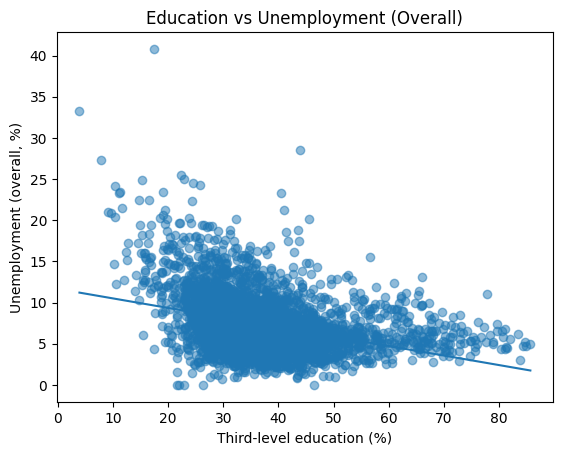

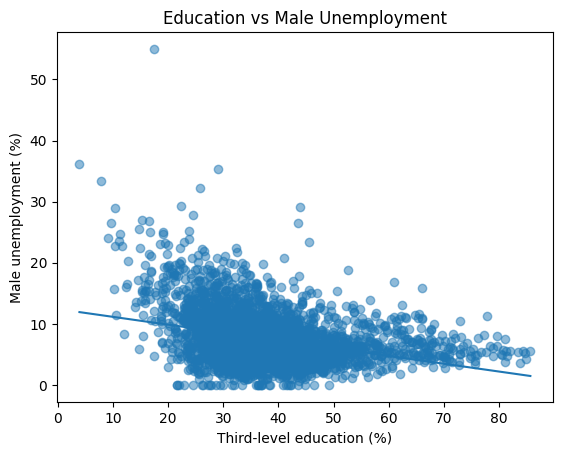

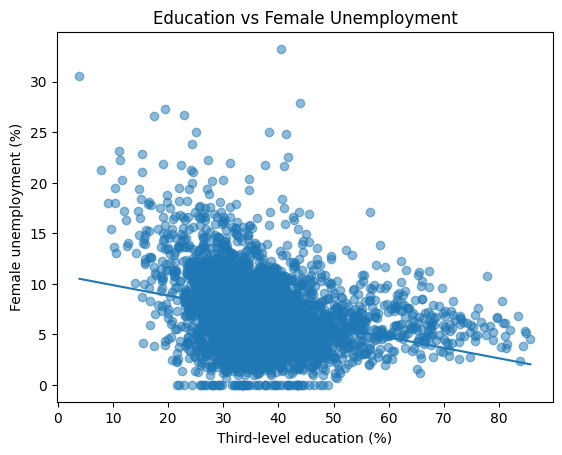

In [12]:
def scatter_with_line(x, y, xlabel, ylabel, title):
    plt.figure()
    plt.scatter(x, y, alpha=0.5)

    # line of best fit
    m, b = np.polyfit(x, y, 1)
    xs = np.linspace(x.min(), x.max(), 100)
    plt.plot(xs, m*xs + b)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

scatter_with_line(d["third_level_pct"], d["unemp_overall"],
                  "Third-level education (%)", "Unemployment (overall, %)",
                  "Education vs Unemployment (Overall)")

scatter_with_line(d["third_level_pct"], d["unemp_male"],
                  "Third-level education (%)", "Male unemployment (%)",
                  "Education vs Male Unemployment")

scatter_with_line(d["third_level_pct"], d["unemp_female"],
                  "Third-level education (%)", "Female unemployment (%)",
                  "Education vs Female Unemployment")